In [1]:
import pandas as pd
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

# The dimensions of our input image
img_width = 28
img_height = 28

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

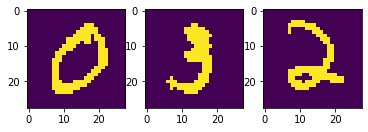

In [57]:
plt.subplot(1,3,1)
plt.imshow(x_train[1]);
plt.subplot(1,3,2)
plt.imshow(x_train[10]);
plt.subplot(1,3,3)
plt.imshow(x_train[2354]);


ValueError: x and y can be no greater than 2D, but have shapes (28,) and (28, 28, 1)

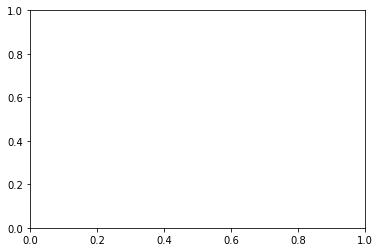

In [43]:
plt.plot(x_train[0])

In [7]:
num_classes = len(np.unique(y_train))
inp = (28,28,1)

In [8]:
x_train = np.round(x_train.astype("float32")/255.)
x_test = np.round(x_test.astype("float32")/255.)

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [14]:
batch_size = 32
epochs = 10

## Linear NN

In [34]:
model = keras.Sequential([
                        layers.Flatten(),
                          layers.Dense(10,'softmax')])
for layer in model.layers:
    layer.trainable = True
model.layers[-1].trainable = True

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [35]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 2s 837us/step - loss: 0.5034 - accuracy: 0.8664 - val_loss: 0.2805 - val_accuracy: 0.9233
Epoch 2/10
1688/1688 [==============================] - 1s 821us/step - loss: 0.3258 - accuracy: 0.9090 - val_loss: 0.2579 - val_accuracy: 0.9270
Epoch 3/10
1688/1688 [==============================] - 1s 815us/step - loss: 0.3029 - accuracy: 0.9149 - val_loss: 0.2491 - val_accuracy: 0.9320
Epoch 4/10
1688/1688 [==============================] - 1s 822us/step - loss: 0.2902 - accuracy: 0.9176 - val_loss: 0.2452 - val_accuracy: 0.9330
Epoch 5/10
1688/1688 [==============================] - 1s 819us/step - loss: 0.2828 - accuracy: 0.9199 - val_loss: 0.2434 - val_accuracy: 0.9328
Epoch 6/10
1688/1688 [==============================] - 1s 821us/step - loss: 0.2767 - accuracy: 0.9220 - val_loss: 0.2461 - val_accuracy: 0.9330
Epoch 7/10
1688/1688 [==============================] - 1s 824us/step - loss: 0.2723 - accuracy: 0.9233 - val_loss: 0.2438 -

In [36]:
model.evaluate(x_test, y_test, batch_size=128)

79/79 [==============================] - 0s 729us/step - loss: 0.2840 - accuracy: 0.9206


[0.2839936912059784, 0.9205999970436096]

In [37]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Frozen CNN + Linear NN

In [40]:
model_2 = keras.Sequential([layers.Conv2D(10,kernel_size = (3,3),activation="relu"),
                           layers.Flatten(),
                            layers.Dense(10,"softmax")
                           ])
for layer in model_2.layers:
    layer.trainable = False # fixing all the layers to be not-trainable
model_2.layers[-1].trainable = True # making the final dense layer to be trainable

In [41]:
model_2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2411 - accuracy: 0.9311 - val_loss: 0.1109 - val_accuracy: 0.9722
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0988 - accuracy: 0.9710 - val_loss: 0.0876 - val_accuracy: 0.9763
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0730 - accuracy: 0.9779 - val_loss: 0.0771 - val_accuracy: 0.9787
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0570 - accuracy: 0.9826 - val_loss: 0.0811 - val_accuracy: 0.9785
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0455 - accuracy: 0.9856 - val_loss: 0.0817 - val_accuracy: 0.9782
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0783 - val_accuracy: 0.9795
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0807 - val_accuracy:

In [42]:
model_2.evaluate(x_test, y_test, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.9749


[0.10050156712532043, 0.9749000072479248]

In [49]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 16, 16, 10)        1700      
                                                                 
 flatten_9 (Flatten)         (None, 2560)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                25610     
                                                                 
Total params: 27,310
Trainable params: 25,610
Non-trainable params: 1,700
_________________________________________________________________


## Frozen Dense + Linear NN

In [53]:
model_3 = keras.Sequential([layers.Flatten(),
                            layers.Dense(3000,activation="tanh"),
                            layers.Dense(10,"softmax")
                           ])
for layer in model_3.layers:
    layer.trainable = False
model_3.layers[-1].trainable = True

In [54]:
model_3.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 2s 4ms/step - loss: 0.4753 - accuracy: 0.8712 - val_loss: 0.2907 - val_accuracy: 0.9198
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.9046 - val_loss: 0.2705 - val_accuracy: 0.9250
Epoch 3/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.9096 - val_loss: 0.2670 - val_accuracy: 0.9258
Epoch 4/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3078 - accuracy: 0.9128 - val_loss: 0.2589 - val_accuracy: 0.9283
Epoch 5/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3005 - accuracy: 0.9150 - val_loss: 0.2660 - val_accuracy: 0.9268
Epoch 6/20
422/422 [==============================] - 1s 4ms/step - loss: 0.2953 - accuracy: 0.9156 - val_loss: 0.2587 - val_accuracy: 0.9267
Epoch 7/20
422/422 [==============================] - 2s 4ms/step - loss: 0.2904 - accuracy: 0.9178 - val_loss: 0.2589 - val_accuracy: 0.9282
Epoch 

In [55]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 3000)              2355000   
                                                                 
 dense_13 (Dense)            (None, 10)                30010     
                                                                 
Total params: 2,385,010
Trainable params: 30,010
Non-trainable params: 2,355,000
_________________________________________________________________


## CIFAR 10

In [42]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [43]:
num_classes = len(np.unique(y_train))
inp = (32,32,3)

x_train = np.round(x_train.astype("float32")/255.)
x_test = np.round(x_test.astype("float32")/255.)

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

### Linear NN

In [44]:
model = keras.Sequential([layers.Flatten(),
                          layers.Dense(10,'softmax')])
for layer in model.layers:
    layer.trainable = False
model.layers[-1].trainable = True

In [45]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 1s 2ms/step - loss: 1.9991 - accuracy: 0.3027 - val_loss: 1.9430 - val_accuracy: 0.3294
Epoch 2/20
352/352 [==============================] - 0s 1ms/step - loss: 1.8935 - accuracy: 0.3428 - val_loss: 1.9078 - val_accuracy: 0.3392
Epoch 3/20
352/352 [==============================] - 0s 1ms/step - loss: 1.8492 - accuracy: 0.3631 - val_loss: 1.8938 - val_accuracy: 0.3420
Epoch 4/20
352/352 [==============================] - 0s 1ms/step - loss: 1.8176 - accuracy: 0.3715 - val_loss: 1.9746 - val_accuracy: 0.3208
Epoch 5/20
352/352 [==============================] - 0s 1ms/step - loss: 1.8032 - accuracy: 0.3794 - val_loss: 1.9628 - val_accuracy: 0.3332
Epoch 6/20
352/352 [==============================] - 1s 2ms/step - loss: 1.7813 - accuracy: 0.3872 - val_loss: 1.9424 - val_accuracy: 0.3332
Epoch 7/20
352/352 [==============================] - 0s 1ms/step - loss: 1.7665 - accuracy: 0.3916 - val_loss: 1.9353 - val_accuracy: 0.3262
Epoch 

## Frozen CNN + Linear NN 

In [46]:
model_2 = keras.Sequential([layers.Conv2D(32,kernel_size = (2,2),activation="relu"),
                           layers.Flatten(),
                            layers.Dense(10,"softmax")
                           ])
for layer in model_2.layers:
    layer.trainable = False
model_2.layers[-1].trainable = True

In [47]:
model_2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 8s 22ms/step - loss: 1.9329 - accuracy: 0.3412 - val_loss: 1.7941 - val_accuracy: 0.3850
Epoch 2/20
352/352 [==============================] - 8s 22ms/step - loss: 1.7062 - accuracy: 0.4106 - val_loss: 1.8348 - val_accuracy: 0.3798
Epoch 3/20
352/352 [==============================] - 8s 22ms/step - loss: 1.6052 - accuracy: 0.4469 - val_loss: 1.8198 - val_accuracy: 0.3762
Epoch 4/20
352/352 [==============================] - 8s 22ms/step - loss: 1.5407 - accuracy: 0.4706 - val_loss: 1.8471 - val_accuracy: 0.3770
Epoch 5/20
352/352 [==============================] - 8s 21ms/step - loss: 1.4639 - accuracy: 0.4938 - val_loss: 1.8859 - val_accuracy: 0.3784
Epoch 6/20
352/352 [==============================] - 8s 21ms/step - loss: 1.4241 - accuracy: 0.5087 - val_loss: 1.9309 - val_accuracy: 0.3548
Epoch 7/20
352/352 [==============================] - 7s 21ms/step - loss: 1.3654 - accuracy: 0.5312 - val_loss: 1.8764 - val_accuracy: 0.3774

### Frozen CNN + Frozen CNN + Linear NN

In [48]:
model_3 = keras.Sequential([layers.Conv2D(32,kernel_size = (2,2),activation="relu"),
                            layers.Conv2D(32,kernel_size = (2,2),activation="relu"),
                           layers.Flatten(),
                            layers.Dense(10,"softmax")
                           ])
for layer in model_3.layers:
    layer.trainable = False
model_3.layers[-1].trainable = True

In [49]:
model_3.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 17s 47ms/step - loss: 1.8760 - accuracy: 0.3397 - val_loss: 1.8243 - val_accuracy: 0.3714
Epoch 2/20
352/352 [==============================] - 17s 47ms/step - loss: 1.7300 - accuracy: 0.3975 - val_loss: 1.7430 - val_accuracy: 0.3872
Epoch 3/20
352/352 [==============================] - 17s 47ms/step - loss: 1.6533 - accuracy: 0.4280 - val_loss: 1.7202 - val_accuracy: 0.3982
Epoch 4/20
352/352 [==============================] - 17s 48ms/step - loss: 1.5997 - accuracy: 0.4432 - val_loss: 1.7159 - val_accuracy: 0.3958
Epoch 5/20
352/352 [==============================] - 21s 59ms/step - loss: 1.5568 - accuracy: 0.4599 - val_loss: 1.7351 - val_accuracy: 0.3882
Epoch 6/20
352/352 [==============================] - 21s 60ms/step - loss: 1.5224 - accuracy: 0.4747 - val_loss: 1.7541 - val_accuracy: 0.3910
Epoch 7/20
352/352 [==============================] - 20s 58ms/step - loss: 1.4948 - accuracy: 0.4833 - val_loss: 1.7282 - val_accuracy: